# **Data Cleaning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
path='/content/drive/MyDrive/Dataset/final_data.csv'

In [ ]:
df=pd.read_csv(path,low_memory=False)
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2016,1,1,6,3,2016-01-06,AA,19805,AA,N4YBAA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,1,1,7,4,2016-01-07,AA,19805,AA,N434AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,1,1,8,5,2016-01-08,AA,19805,AA,N541AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016,1,1,9,6,2016-01-09,AA,19805,AA,N489AA,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016,1,1,10,7,2016-01-10,AA,19805,AA,N439AA,...,4.0,0.0,0.0,47.0,0.0,66.0,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(5635978, 65)

In [ ]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY

In [ ]:
# checking for any missing values
df.isna().sum().sort_values(ascending=False).head(25)

,0
Unnamed: 64,5635978
FIRST_DEP_TIME,5601445
LONGEST_ADD_GTIME,5601445
TOTAL_ADD_GTIME,5601445
CANCELLATION_CODE,5570003
WEATHER_DELAY,4667538
CARRIER_DELAY,4667538
SECURITY_DELAY,4667538
NAS_DELAY,4667538
LATE_AIRCRAFT_DELAY,4667538


In [ ]:
# checking for any useless columns
df.nunique().sort_values().head(30)

,0
Unnamed: 64,0
FLIGHTS,1
ARR_DEL15,2
YEAR,2
DEP_DEL15,3
DIVERTED,3
CANCELLED,4
QUARTER,5
CANCELLATION_CODE,6
DAY_OF_WEEK,8


In [ ]:
df.dtypes

,0
YEAR,object
QUARTER,object
MONTH,int64
DAY_OF_MONTH,object
DAY_OF_WEEK,object
...,...
LATE_AIRCRAFT_DELAY,float64
FIRST_DEP_TIME,float64
TOTAL_ADD_GTIME,float64
LONGEST_ADD_GTIME,float64


In [ ]:
# to remove the exact duplicates
print("duplicates:",df.duplicated().sum())

duplicates: 97853


In [ ]:
df=df.drop_duplicates().reset_index(drop=True)
print("after dropping duplicates:",df.shape)

after dropping duplicates: (5538125, 65)


In [ ]:
columns_to_drop=['WEATHER_DELAY','CARRIER_DELAY','NAS_DELAY','SECURITY_DELAY',
                 'LATE_AIRCRAFT_DELAY','CANCELLATION_CODE','FIRST_DEP_TIME',
                 'TOTAL_ADD_GTIME','LONGEST_ADD_GTIME','Unnamed: 64']
df=df.drop(columns=[c for c in columns_to_drop if c in df.columns])
print(df.shape)

(5538125, 55)


In [ ]:
leak_columns=['DEP_DELAY','DEP_DELAY_NEW','DEP_DELAY_GROUP',
              'ARR_DELAY','ARR_DELAY_NEW','ARR_DELAY_GROUP']
df=df.drop(columns=[c for c in leak_columns if c in df.columns])
print(df.shape)

(5538125, 49)


In [ ]:
id_cols=['AIRLINE_ID','ORIGIN_AIRPORT_ID','DEST_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID',
         'DEST_AIRPORT_SEQ_ID','ORIGIN_STATE_ABR','DEST_STATE_ABR','ORIGIN_STATE_FIPS',
         'DEST_STATE_FIPS','ORIGIN_STATE_NM','DEST_STATE_NM','ORIGIN_WAC','DEST_WAC']
df=df.drop(columns=[c for c in id_cols if c in df.columns])
print(df.shape)

(5538125, 36)


In [ ]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'CARRIER', 'TAIL_NUM', 'FL_NUM',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DEL15', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DEL15',
       'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP'],
      dtype='object')

In [ ]:
df=df.drop_duplicates().reset_index(drop=True)

In [ ]:
df=df[(df['CANCELLED']==0)&(df['DIVERTED']==0)]
df=df.drop(columns=['CANCELLED','DIVERTED'])

In [ ]:
drop_columns=['DEP_TIME','ARR_TIME','WHEELS_OFF','WHEELS_ON',
             'ORIGIN_CITY_NAME','DEST_CITY_NAME',
             'ORIGIN_CITY_MARKET_ID','DEST_CITY_MARKET_ID']
df=df.drop(columns=[c for c in drop_columns if c in df.columns])
print(df.shape)

(5454969, 26)


In [ ]:
df.isna().sum()

,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
FL_DATE,0
UNIQUE_CARRIER,0
CARRIER,0
TAIL_NUM,0
FL_NUM,0


In [ ]:
df.duplicated().sum()

np.int64(14462)

In [ ]:
df=df.drop_duplicates().reset_index(drop=True)
print('dplicates after',df.duplicated().sum())
print("new shape:",df.shape)

dplicates after 0
new shape: (5440507, 26)


In [ ]:
df.isnull().sum()

,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
FL_DATE,0
UNIQUE_CARRIER,0
CARRIER,0
TAIL_NUM,0
FL_NUM,0


In [ ]:
df.dtypes

,0
YEAR,object
QUARTER,object
MONTH,int64
DAY_OF_MONTH,object
DAY_OF_WEEK,object
FL_DATE,object
UNIQUE_CARRIER,object
CARRIER,object
TAIL_NUM,object
FL_NUM,object


checking consistency

In [ ]:
invalid_times=df[(df['CRS_DEP_TIME']>2359)|(df['CRS_ARR_TIME']>2359)]

In [ ]:
df['TAXI_OUT']=pd.to_numeric(df['TAXI_OUT'],errors='coerce')
df['TAXI_IN']=pd.to_numeric(df['TAXI_IN'],errors='coerce')

In [ ]:
df[(df['TAXI_OUT']<0)|(df['TAXI_IN']<0)]

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,UNIQUE_CARRIER,CARRIER,TAIL_NUM,FL_NUM,...,TAXI_IN,CRS_ARR_TIME,ARR_DEL15,ARR_TIME_BLK,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP


In [ ]:
df['elapsed_diff']=df['ACTUAL_ELAPSED_TIME']-(df['AIR_TIME']+df['TAXI_IN']+df['TAXI_OUT'])
df['elapsed_diff'].describe()

,elapsed_diff
count,5440507.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
df.shape

(5440507, 27)

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
FL_DATE,0
UNIQUE_CARRIER,0
CARRIER,0
TAIL_NUM,0
FL_NUM,0


In [ ]:
df.dtypes

,0
YEAR,object
QUARTER,object
MONTH,int64
DAY_OF_MONTH,object
DAY_OF_WEEK,object
FL_DATE,object
UNIQUE_CARRIER,object
CARRIER,object
TAIL_NUM,object
FL_NUM,object


In [ ]:
#Converting the numeric columns to int
num_int_cols=['YEAR','QUARTER','DAY_OF_MONTH','DAY_OF_WEEK','FL_NUM']
for col in num_int_cols:
  df[col]=pd.to_numeric(df[col],errors='coerce').astype('Int64')

In [ ]:
df['FL_DATE']=pd.to_datetime(df['FL_DATE'],errors='coerce')

In [ ]:
cat_cols=['UNIQUE_CARRIER','CARRIER','TAIL_NUM',
          'ORIGIN','DEST','DEP_TIME_BLK','ARR_TIME_BLK']
for col in cat_cols:
  df[col]=df[col].astype('category')

In [ ]:
float_cols=['CRS_DEP_TIME','DEP_DEL15','TAXI_OUT','TAXI_IN',
            'CRS_ARR_TIME','ARR_DEL15','CRS_ELAPSED_TIME',
            'ACTUAL_ELAPSED_TIME','AIR_TIME','FLIGHTS','DISTANCE',
            'DISTANCE_GROUP','elapsed_diff']
for col in float_cols:
  df[col]=pd.to_numeric(df[col],errors='coerce')

In [ ]:
df.dtypes

,0
YEAR,Int64
QUARTER,Int64
MONTH,int64
DAY_OF_MONTH,Int64
DAY_OF_WEEK,Int64
FL_DATE,datetime64[ns]
UNIQUE_CARRIER,category
CARRIER,category
TAIL_NUM,category
FL_NUM,Int64


In [ ]:
cols_to_drop=['CARRIER','DISTANCE_GROUP','DEP_TIME_BLK','ARR_TIME_BLK']
df=df.drop(columns=cols_to_drop)

In [ ]:
df.shape

(5440507, 23)

In [ ]:
df.dtypes

,0
YEAR,Int64
QUARTER,Int64
MONTH,int64
DAY_OF_MONTH,Int64
DAY_OF_WEEK,Int64
FL_DATE,datetime64[ns]
UNIQUE_CARRIER,category
TAIL_NUM,category
FL_NUM,Int64
ORIGIN,category


In [ ]:
desired_rows=1_000_00
df_small=df.sample(n=desired_rows,random_state=42)

In [ ]:
df_small.shape

(100000, 23)

In [ ]:
df.shape

(5440507, 23)

In [ ]:
desired_rows=1_000_00
df=df.sample(n=desired_rows,random_state=42).reset_index(drop=True)

In [ ]:
df.shape

(100000, 23)

# **Feature Engineering**

In [ ]:
df['DEP_HOUR']=(df['CRS_DEP_TIME']//100).astype(int)
df['ARR_HOUR']=(df['CRS_ARR_TIME']//100).astype(int)

In [ ]:
def part_of_day(h):
  if 5<=h<12:return 'morning'
  if 12<=h<17:return 'afternoon'
  if 17<=h<22: return 'evening'
  else: return 'night'

In [ ]:
df['distance_group']=pd.cut(df['DISTANCE'],
                            bins=[0,300,800,1500,10000],
                            labels=['short','medium','long','very_long'],
                            include_lowest=True)


In [ ]:
df['taxi_diff']=df['TAXI_OUT']-df['TAXI_IN']

In [ ]:
df['scheduled_deviation']=df['ACTUAL_ELAPSED_TIME']-df['CRS_ELAPSED_TIME']

In [ ]:
df['duration_cat'] = pd.cut(df['ACTUAL_ELAPSED_TIME'],
                            bins=[0,60,120,180,240,500],
                            labels=['short','medium','long','very_long','ultra'])


for departures

In [ ]:
#Converting turn around time to minutes
df['Turn_around_time']=df['TAXI_OUT']+df['AIR_TIME']+df['TAXI_IN']

In [ ]:
# Converting minutes to hours
df['Turn_around_time']=((df['Turn_around_time']/60)%24)

In [ ]:
df['Turn_stress']=df['Turn_around_time']/df['ACTUAL_ELAPSED_TIME']

In [ ]:
#Destination congestion at origin airport by grouping days , origin and departure hour
df['origin_dep_congestion']=(
    df.groupby(['FL_DATE','ORIGIN','DEP_HOUR'],observed=True)['FL_NUM'].transform('count').astype("int16"))

In [ ]:
df['dep_part_of_day']=df['DEP_HOUR'].apply(part_of_day)

In [ ]:
df['Departure_distance_congestion']=(df['distance_group'].astype(str) +"_"+
                                   df['origin_dep_congestion'].astype(str))

In [ ]:
df['dep_pressure']=df['CRS_DEP_TIME'].astype(int)-df['DEP_HOUR']*100

In [ ]:
df['origin_hour_congestion']=df['origin_dep_congestion']*df['DEP_HOUR']

In [ ]:
df['is_peak_dep']=df['DEP_HOUR'].isin([6,7,8,16,17,18]).astype(int)

For arrivals

In [ ]:
#Arrival Congestion at destination airport
df['dest_arr_congestion']=(
    df.groupby(['FL_DATE','DEST','ARR_HOUR'],observed=True)['FL_NUM'].transform('count').astype("int16"))

In [ ]:
df['arr_part_of_day']=df['ARR_HOUR'].apply(part_of_day)

In [ ]:
df['Arrival_distance_congestion']=(df['distance_group'].astype(str) +"_"+
                                   df['dest_arr_congestion'].astype(str))

In [ ]:
df['arr_pressure']=df['CRS_ARR_TIME'].astype(int)-df['ARR_HOUR']*100

In [ ]:
df['dest_hour_congestion']=df['dest_arr_congestion']*df['ARR_HOUR']

In [ ]:
df['is_peak_arr']=df['ARR_HOUR'].isin([6,7,8,16,17,18]).astype(int)

In [ ]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_DEL15', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'FLIGHTS', 'DISTANCE', 'DEP_HOUR', 'ARR_HOUR', 'distance_group',
       'Turn_around_time', 'origin_dep_congestion', 'dep_part_of_day',
       'Departure_distance_congestion', 'dest_arr_congestion',
       'arr_part_of_day', 'Arrival_distance_congestion', 'dep_pressure',
       'arr_pressure', 'Turn_stress', 'origin_hour_congestion',
       'dest_hour_congestion', 'is_peak_dep', 'is_peak_arr', 'taxi_diff',
       'scheduled_deviation', 'duration_cat'],
      dtype='object')

In [ ]:
df.shape

(100000, 42)

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
duration_cat,79
YEAR,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
FL_DATE,0
UNIQUE_CARRIER,0
TAIL_NUM,0
FL_NUM,0
QUARTER,0


In [ ]:
df['duration_cat']=df['duration_cat'].fillna(df['duration_cat'].mode()[0])

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0
FL_DATE,0
UNIQUE_CARRIER,0
TAIL_NUM,0
FL_NUM,0
ORIGIN,0


In [ ]:
num_cols = [
    'dep_pressure',
    'arr_pressure',
    'Turn_stress',
    'origin_hour_congestion',
    'dest_hour_congestion',
    'taxi_diff',
    'scheduled_deviation',
    'is_peak_dep',
    'is_peak_arr',
    'taxi_diff',
    'scheduled_deviation'
]

for col in num_cols:
    df[col].fillna(df[col].median())

In [ ]:
#df.to_csv('clean_flight_data.csv',index=False)

In [ ]:
df=df.dropna(subset=['ORIGIN','DEST'])

In [ ]:
categories=['morning','afternoon','evening','night','medium']

In [ ]:
cat_cols_unknown=['dep_part_of_day','arr_part_of_day','distance_group','duration_cat']
for col in cat_cols_unknown:
  df[col]=df[col].astype('category')

In [ ]:
if 'unknown' not in df[col].cat.categories:
  df[col]=df[col].cat.add_categories(['unknown'])

In [ ]:
df[col]=df[col].fillna('unknown')

In [ ]:
df['dep_part_of_day']=df['dep_part_of_day'].fillna('unknown')
df['arr_part_of_day']=df['arr_part_of_day'].fillna('unknown')
df['distance_group']=df['distance_group'].fillna('unknown')

In [ ]:
for col in num_congestion_cols:
  print(col, df[col]. unique())

origin_dep_congestion [1 2 3 4 5 7 6 8]
dest_arr_congestion [1 3 2 5 4 6 7]
Arrival_distance_congestion ['medium_1', 'long_1', 'medium_3', 'short_1', 'medium_2', ..., 'medium_7', 'short_6', 'long_7', 'short_7', 'very_long_6']
Length: 28
Categories (28, object): ['long_1', 'long_2', 'long_3', 'long_4', ..., 'very_long_4', 'very_long_5',
                          'very_long_6', 'very_long_7']
Departure_distance_congestion ['medium_1', 'long_1', 'short_1', 'short_2', 'long_2', ..., 'short_6', 'very_long_8', 'long_8', 'very_long_7', 'short_8']
Length: 32
Categories (32, object): ['long_1', 'long_2', 'long_3', 'long_4', ..., 'very_long_5', 'very_long_6',
                          'very_long_7', 'very_long_8']


In [ ]:
cat_congestion_cols=['origin_dep_congestion','dest_arr_congestion',
                     'Arrival_distance_congestion','Departure_distance_congestion'
]

df[cat_congestion_cols] = df[cat_congestion_cols].astype(str)

In [ ]:
df[cat_congestion_cols] = df[cat_congestion_cols].replace('nan', 'unknown')

In [ ]:
import re
def convert_congestion_level(x):
  if '_'in x:
    try:
      return int(x.split('_')[1])
    except:
      return 0
  return 0

In [ ]:
for col in cat_congestion_cols:
  df[col]=df[col].apply(convert_congestion_level)

In [ ]:
df[cat_congestion_cols] = df[cat_congestion_cols].astype(float)

In [ ]:
df['origin_dep_congestion']=df['origin_dep_congestion'].fillna(0)
df['dest_arr_congestion']=df['dest_arr_congestion'].fillna(0)
df['Arrival_distance_congestion']=df['Arrival_distance_congestion'].fillna(0)
df['Departure_distance_congestion']=df['Departure_distance_congestion'].fillna(0)

In [ ]:
df['Turn_around_time']=df['Turn_around_time'].fillna(df['Turn_around_time'].median())

In [ ]:
num_cols=['DEP_HOUR','ARR_HOUR','DISTANCE']
df[num_cols]=df[num_cols].fillna(df[num_cols].median())

In [ ]:
cat_cols=[
    'dep_part_of_day','arr_part_of_day',
    'Arrival_distance_congestion','Departure_distance_congestion'
]
for c in cat_cols:
  df[c]=df[c].astype('category')

In [ ]:
time_cats=['YEAR','QUARTER','MONTH','DAY_OF_WEEK']
df[time_cats]=df[time_cats].astype('category')

In [ ]:
df.dtypes

,0
YEAR,category
QUARTER,category
MONTH,category
DAY_OF_MONTH,Int64
DAY_OF_WEEK,category
FL_DATE,datetime64[ns]
UNIQUE_CARRIER,category
TAIL_NUM,category
FL_NUM,Int64
ORIGIN,category


In [ ]:
df.describe()

,DAY_OF_MONTH,FL_DATE,FL_NUM,CRS_DEP_TIME,DEP_DEL15,TAXI_OUT,TAXI_IN,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,...,dest_arr_congestion,dep_pressure,arr_pressure,Turn_stress,origin_hour_congestion,dest_hour_congestion,is_peak_dep,is_peak_arr,taxi_diff,scheduled_deviation
count,100000.0,100000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,15.76799,2016-07-04 01:58:27.264000,2078.31862,1330.233050,0.171040,16.211930,7.476570,1490.617450,0.174500,145.438400,...,0.0,26.869050,29.051450,1.666667e-02,18.061880,19.821900,0.382590,0.286290,8.735360,-5.306210
min,1.0,2016-01-01 00:00:00,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000,...,0.0,0.000000,0.000000,1.666667e-02,0.000000,0.000000,0.000000,0.000000,-188.000000,-91.000000
25%,8.0,2016-04-04 00:00:00,718.0,915.000000,0.000000,11.000000,4.000000,1105.000000,0.000000,88.000000,...,0.0,10.000000,14.000000,1.666667e-02,10.000000,12.000000,0.000000,0.000000,4.000000,-13.000000
50%,16.0,2016-07-06 00:00:00,1642.0,1323.000000,0.000000,14.000000,6.000000,1520.000000,0.000000,126.000000,...,0.0,26.000000,29.000000,1.666667e-02,15.000000,17.000000,0.000000,0.000000,7.000000,-6.000000
75%,23.0,2016-10-01 00:00:00,2851.0,1735.000000,0.000000,19.000000,9.000000,1920.000000,0.000000,178.000000,...,0.0,43.000000,45.000000,1.666667e-02,21.000000,22.000000,1.000000,1.000000,13.000000,1.000000
max,31.0,2016-12-31 00:00:00,8402.0,2359.000000,1.000000,159.000000,202.000000,2359.000000,1.000000,700.000000,...,0.0,59.000000,59.000000,1.666667e-02,152.000000,126.000000,1.000000,1.000000,155.000000,194.000000
std,8.796914,NaN,1695.043706,489.636883,0.376546,8.955246,5.731005,515.227645,0.379541,76.690521,...,0.0,18.061189,17.648907,1.186909e-14,12.215507,12.294461,0.486022,0.452029,10.547153,13.117752


In [ ]:
df.describe(include=['category'])

,YEAR,QUARTER,MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,ORIGIN,DEST,distance_group,dep_part_of_day,Departure_distance_congestion,arr_part_of_day,Arrival_distance_congestion,duration_cat
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000.0,100000,100000.0,100000
unique,1,4,12,7,12,4819,305,308,4,4,9.0,4,8.0,5
top,2016,3,8,5,WN,N491HA,ATL,ATL,medium,morning,1.0,evening,1.0,medium
freq,100000,26350,9065,15018,23453,82,6905,7058,40893,41135,61971.0,30379,62717.0,41641


In [ ]:
df.describe(include=['datetime'])

,FL_DATE
count,100000
mean,2016-07-04 01:58:27.264000
min,2016-01-01 00:00:00
25%,2016-04-04 00:00:00
50%,2016-07-06 00:00:00
75%,2016-10-01 00:00:00
max,2016-12-31 00:00:00


# **Explanatory data analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

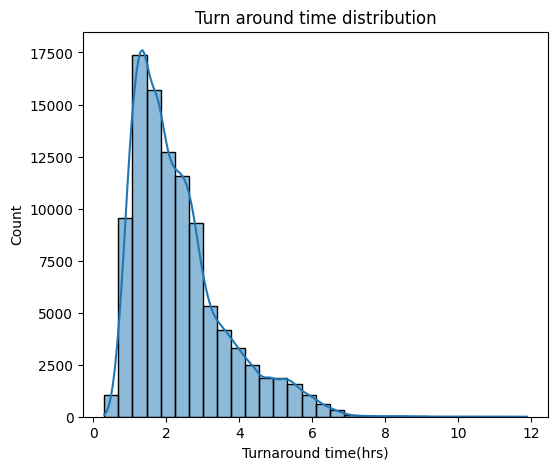

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(df['Turn_around_time'],bins=30,kde=True)
plt.title('Turn around time distribution')
plt.xlabel('Turnaround time(hrs)')
plt.ylabel('Count')
plt.show()

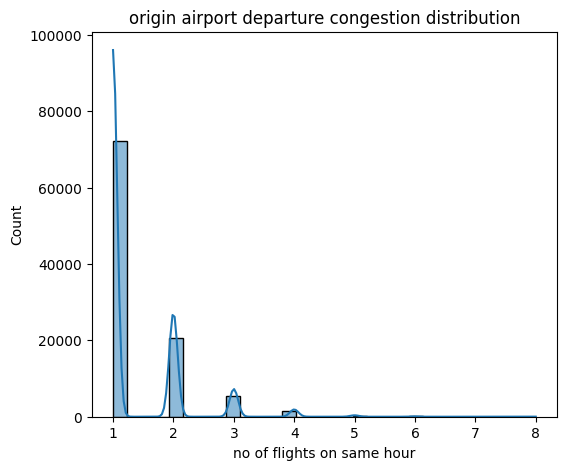

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(df['origin_dep_congestion'],bins=30,kde=True)
plt.title('origin airport departure congestion distribution')
plt.xlabel('no of flights on same hour')
plt.ylabel('Count')
plt.show()

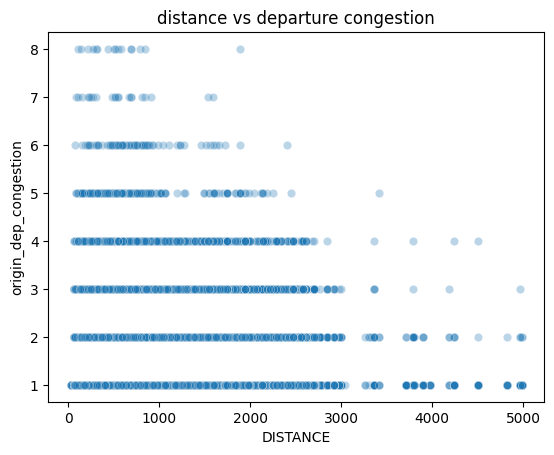

In [ ]:
sns.scatterplot(data=df, x='DISTANCE',y='origin_dep_congestion',alpha=0.3)
plt.title('distance vs departure congestion')
plt.show()

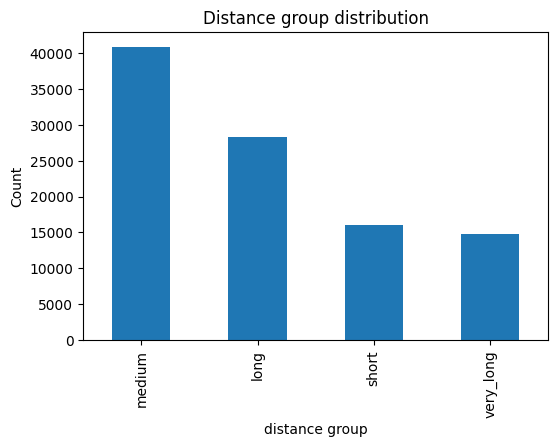

In [ ]:
plt.figure(figsize=(6,4))
df['distance_group'].value_counts().plot(kind='bar')
plt.title('Distance group distribution')
plt.xlabel('distance group')
plt.ylabel('Count')
plt.show()

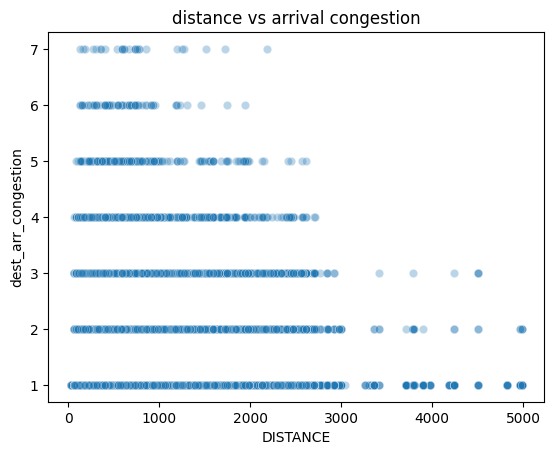

In [ ]:
sns.scatterplot(data=df, x='DISTANCE',y='dest_arr_congestion',alpha=0.3)
plt.title('distance vs arrival congestion')
plt.show()

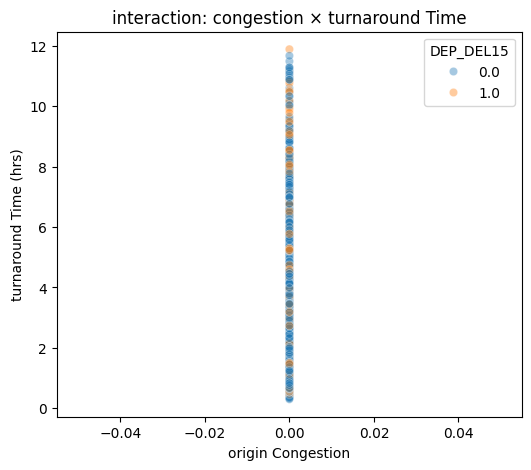

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='origin_dep_congestion', y='Turn_around_time',
                hue='DEP_DEL15', alpha=0.4)
plt.title("interaction: congestion × turnaround Time")
plt.xlabel("origin Congestion")
plt.ylabel("turnaround Time (hrs)")
plt.show()

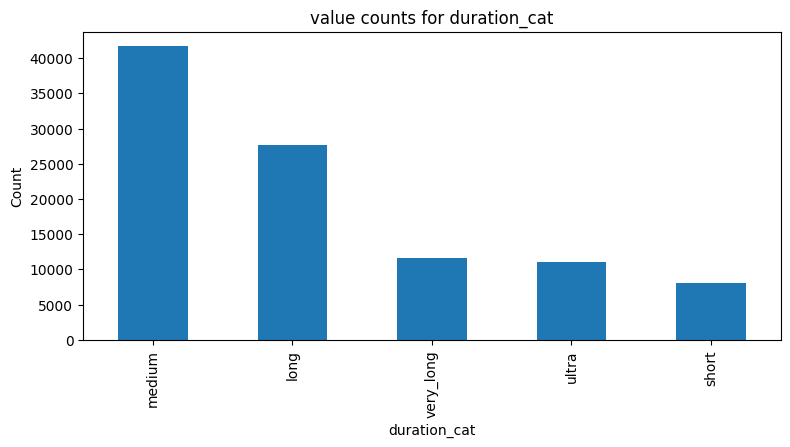

In [ ]:
categorical_cols=['duration_cat']
for col in categorical_cols:
  plt.figure(figsize=(9,4))
  df[col].value_counts().head(15).plot(kind='bar')
  plt.title(f'value counts for {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show

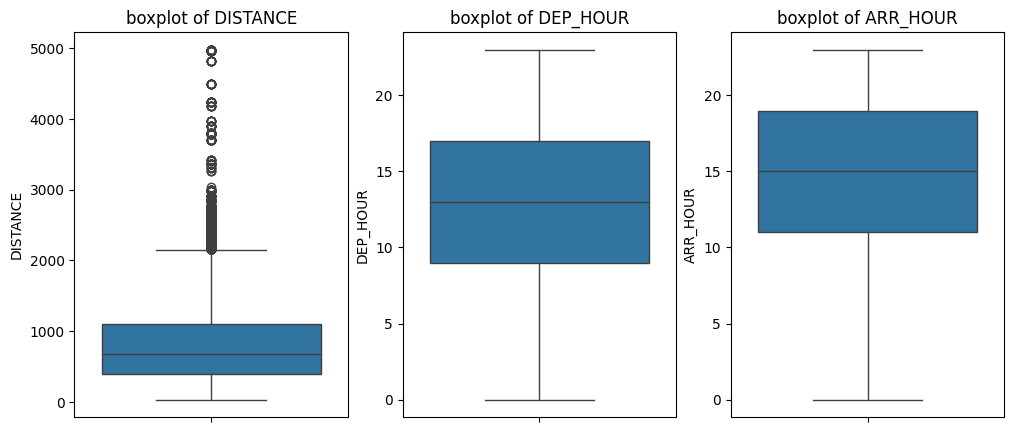

In [ ]:
numeric_cols=['DISTANCE','DEP_HOUR','ARR_HOUR']
plt.figure(figsize=(12,5))
for i, col in enumerate(numeric_cols,1):
  plt.subplot(1,3,i)
  sns.boxplot(y=df[col])
  plt.title(f'boxplot of {col}')

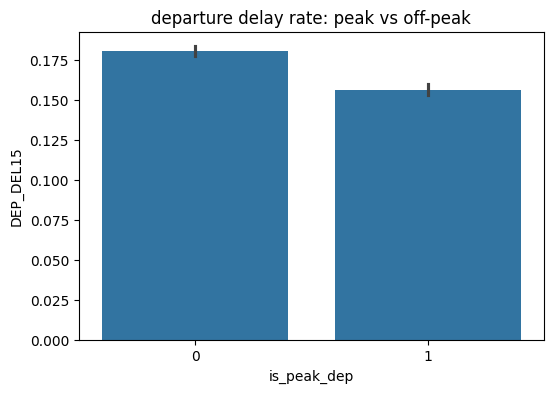

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='is_peak_dep',y='DEP_DEL15', data=df)
plt.title('departure delay rate: peak vs off-peak')
plt.show()

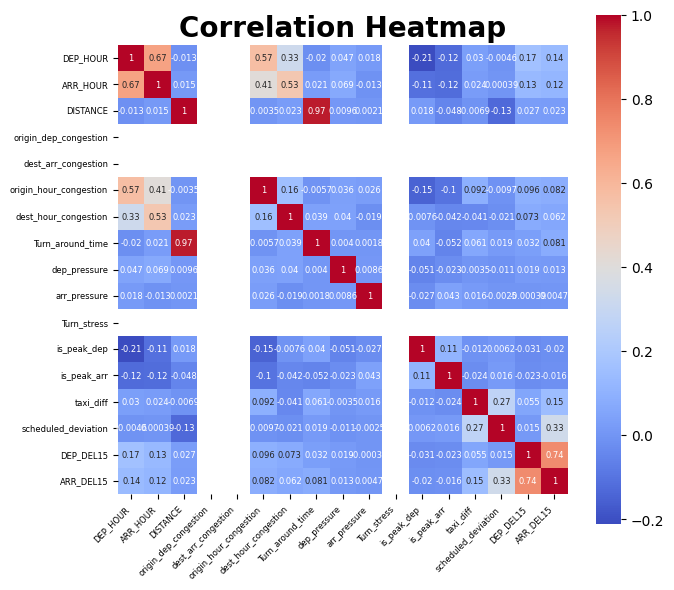

In [ ]:
num_cols = [
    'DEP_HOUR','ARR_HOUR','DISTANCE',
    'origin_dep_congestion','dest_arr_congestion',
    'origin_hour_congestion','dest_hour_congestion',
    'Turn_around_time','dep_pressure','arr_pressure','Turn_stress',
    'is_peak_dep','is_peak_arr','taxi_diff','scheduled_deviation',
    'DEP_DEL15','ARR_DEL15']

plt.figure(figsize=(7,7))
corr = df[num_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    linewidths=0.001,
    linecolor='gray',
    square=True,
    annot_kws={"size":6},
    cbar_kws={"shrink":0.8}
)
plt.title("Correlation Heatmap", fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.yticks(rotation=0, fontsize=6)
plt.tight_layout()
plt.show()


In [ ]:
df.to_csv('/content/drive/MyDrive/Dataset/cleaned_flight_data.csv',index=False)
print('Dataset saved to Drive ')

Dataset saved to Drive 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Dataset/cleaned_flight_data.csv')

In [ ]:
df.shape

(100000, 42)

In [ ]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN', 'DEST',
       'CRS_DEP_TIME', 'DEP_DEL15', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME',
       'ARR_DEL15', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME',
       'FLIGHTS', 'DISTANCE', 'DEP_HOUR', 'ARR_HOUR', 'distance_group',
       'Turn_around_time', 'origin_dep_congestion', 'dep_part_of_day',
       'Departure_distance_congestion', 'dest_arr_congestion',
       'arr_part_of_day', 'Arrival_distance_congestion', 'dep_pressure',
       'arr_pressure', 'Turn_stress', 'origin_hour_congestion',
       'dest_hour_congestion', 'is_peak_dep', 'is_peak_arr', 'taxi_diff',
       'scheduled_deviation', 'duration_cat'],
      dtype='object')

# **Data Preprocessing**

In [ ]:
df.isna().sum().sort_values(ascending=False).head()

,0
YEAR,0
QUARTER,0
MONTH,0
DAY_OF_MONTH,0
DAY_OF_WEEK,0


In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
y_dep=df['DEP_DEL15']

In [ ]:
X_dep=df[['MONTH','DAY_OF_WEEK','UNIQUE_CARRIER','ORIGIN',
         'DEST','DISTANCE','DEP_HOUR','Turn_stress','dep_pressure',
         'origin_dep_congestion','dep_part_of_day','Departure_distance_congestion',
          'is_peak_dep','taxi_diff','scheduled_deviation','duration_cat']]

In [ ]:
y_arr=df['ARR_DEL15']

In [ ]:
X_arr=df[['MONTH','DAY_OF_WEEK','UNIQUE_CARRIER','ORIGIN',
         'DEST','DISTANCE','ARR_HOUR','Turn_stress','arr_pressure',
          'dest_arr_congestion','arr_part_of_day','Arrival_distance_congestion',
          'is_peak_arr','taxi_diff','scheduled_deviation','duration_cat']]

In [ ]:
from sklearn.model_selection import train_test_split

splitting into train set and test set

In [ ]:
X_dep_train, X_dep_test, y_dep_train, y_dep_test=train_test_split(
    X_dep, y_dep,
    test_size=0.2,
    random_state=42,
    stratify=y_dep
)

In [ ]:
X_arr_train, X_arr_test, y_arr_train, y_arr_test=train_test_split(
    X_arr, y_arr,
    test_size=0.2,
    random_state=42,
    stratify=y_arr
)

In [ ]:
print('X_dep_train',X_dep_train.shape)
print('X_dep_test',X_dep_test.shape)
print('y_dep_train',y_dep_train.shape)
print('y_dep_test',y_dep_test.shape)

X_dep_train (80000, 16)
X_dep_test (20000, 16)
y_dep_train (80000,)
y_dep_test (20000,)


In [ ]:
print('X_arr_train',X_arr_train.shape)
print('X_arr_test',X_arr_test.shape)
print('y_arr_train',y_arr_train.shape)
print('y_arr_test',y_arr_test.shape)

X_arr_train (80000, 16)
X_arr_test (20000, 16)
y_arr_train (80000,)
y_arr_test (20000,)


Encoding the categorical and numerical features

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [ ]:
cat_col_dep=['MONTH','DAY_OF_WEEK','UNIQUE_CARRIER','ORIGIN','DEST',
             'dep_part_of_day','Departure_distance_congestion','duration_cat']

In [ ]:
cat_col_arr=['MONTH','DAY_OF_WEEK','UNIQUE_CARRIER','ORIGIN','DEST',
             'arr_part_of_day','Arrival_distance_congestion','duration_cat']

In [ ]:
num_cols_dep=['DISTANCE','DEP_HOUR','Turn_stress',
              'origin_dep_congestion','is_peak_dep','taxi_diff','scheduled_deviation']

In [ ]:
num_cols_arr=['DISTANCE','ARR_HOUR','Turn_stress',
              'dest_arr_congestion','is_peak_arr','taxi_diff','scheduled_deviation']

checking for any missing values

In [ ]:
print('missing values in categorical dep columns')
print(X_dep_train[cat_col_dep].isna().sum())

missing values in categorical dep columns
MONTH                            0
DAY_OF_WEEK                      0
UNIQUE_CARRIER                   0
ORIGIN                           0
DEST                             0
dep_part_of_day                  0
Departure_distance_congestion    0
duration_cat                     0
dtype: int64


In [ ]:
print('missing values in numerical dep columns')
print(X_dep_train[num_cols_dep].isna().sum())

missing values in numerical dep columns
DISTANCE                 0
DEP_HOUR                 0
Turn_stress              0
origin_dep_congestion    0
is_peak_dep              0
taxi_diff                0
scheduled_deviation      0
dtype: int64


In [ ]:
print('missing values in categorical arr columns')
print(X_arr_train[cat_col_arr].isna().sum())

missing values in categorical arr columns
MONTH                          0
DAY_OF_WEEK                    0
UNIQUE_CARRIER                 0
ORIGIN                         0
DEST                           0
arr_part_of_day                0
Arrival_distance_congestion    0
duration_cat                   0
dtype: int64


In [ ]:
print('missing values in numerical arr columns')
print(X_arr_train[num_cols_arr].isna().sum())

missing values in numerical arr columns
DISTANCE               0
ARR_HOUR               0
Turn_stress            0
dest_arr_congestion    0
is_peak_arr            0
taxi_diff              0
scheduled_deviation    0
dtype: int64


In [ ]:
print('missing dep cats:',
      [c for c in cat_col_dep if c not in X_dep_train.columns])
print('missing dep numericals:',
      [c for c in num_cols_dep if c not in X_dep_train.columns])

missing dep cats: []
missing dep numericals: []


In [ ]:
print('missing arr cats:',
      [c for c in cat_col_arr if c not in X_arr_train.columns])
print('missing arr numericals:',
      [c for c in num_cols_arr if c not in X_arr_train.columns])

missing arr cats: []
missing arr numericals: []


In [ ]:
preprocess_dep=ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat_col_dep),
        ('num',StandardScaler(), num_cols_dep)
    ]
)

In [ ]:
preprocess_arr=ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'),cat_col_arr),
        ('num',StandardScaler(), num_cols_arr)
    ]
)

Transforming the dataset for departure and arrival for preprocessing transformers

In [ ]:
X_dep_train_enc=preprocess_dep.fit_transform(X_dep_train)
X_dep_test_enc=preprocess_dep.transform(X_dep_test)

In [ ]:
print('encoded X_dep_train shape',X_dep_train_enc.shape)
print('encoded X_dep_test shape',X_dep_test_enc.shape)

encoded X_dep_train shape (80000, 666)
encoded X_dep_test shape (20000, 666)


In [ ]:
X_arr_train_enc=preprocess_arr.fit_transform(X_arr_train)
X_arr_test_enc=preprocess_arr.transform(X_arr_test)

In [ ]:
print('encoded X_arr_train shape',X_arr_train_enc.shape)
print('encoded X_arr_test shape',X_arr_test_enc.shape)

encoded X_arr_train shape (80000, 666)
encoded X_arr_test shape (20000, 666)


Balancing

In [ ]:
print(y_dep_train.value_counts(normalize=True))

DEP_DEL15
0.0    0.828963
1.0    0.171038
Name: proportion, dtype: float64


In [ ]:
print(y_arr_train.value_counts(normalize=True))

ARR_DEL15
0.0    0.8255
1.0    0.1745
Name: proportion, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE
smote_dep=SMOTE(random_state=42)
X_dep_train_bal, y_dep_train_bal=smote_dep.fit_resample(
    X_dep_train_enc, y_dep_train
)

In [ ]:
print('Balanced departure train shape',X_dep_train_bal.shape)
print(y_dep_train_bal.value_counts())

Balanced departure train shape (132634, 666)
DEP_DEL15
0.0    66317
1.0    66317
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
smote_arr=SMOTE(random_state=42)
X_arr_train_bal, y_arr_train_bal=smote_arr.fit_resample(
    X_arr_train_enc, y_arr_train
)

In [ ]:
print('Balanced arrival train shape',X_arr_train_bal.shape)
print(y_arr_train_bal.value_counts())

Balanced arrival train shape (132080, 666)
ARR_DEL15
1.0    66040
0.0    66040
Name: count, dtype: int64


# **Data Modelling**

In [ ]:
from sklearn.metrics import(accuracy_score,
                            classification_report,
                            confusion_matrix,
                            roc_auc_score,
                            precision_recall_fscore_support)

**CatBoost algorithm**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 29.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import(accuracy_score, classification_report, confusion_matrix, roc_auc_score)

In [ ]:
def evaluate_model(name, model, X_test, y_test):
  print(f'\n==={name}===')
  y_pred=model.predict(X_test)

  try:
    y_pred_prob= model.predict_proba(X_test)[:,1]
    auc=roc_auc_score(y_test, y_pred_prob)
  except:
    auc=None

  acc=accuracy_score(y_test, y_pred)
  precision, recall, f1, _=precision_recall_fscore_support(
      y_test, y_pred, average='binary', zero_division=0
  )

  print(f'accuracy:{acc:.3f}')
  print(f'precision:{precision:.3f}')
  print(f'recall:{recall:.3f}')
  print(f'F1-score:{f1:.3f}')

  if auc is not None:
    print(f'AUC:{auc:.3f}')
  else:
    print('AUC: is not available for this model(no predict_proba)')

  print(f'\nConfusion Matrix')
  print(confusion_matrix(y_test, y_pred))

  print('\n Classification report')
  print(classification_report(y_test, y_pred, zero_division=0))

In [ ]:
cat_dep=CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    eval_metric='F1',
    loss_function='Logloss',
    verbose=False
)

cat_dep.fit(X_dep_train_enc, y_dep_train)

y_dep_pred=cat_dep.predict(X_dep_test_enc)

print('Cat Boost - departure delay')
print('Accuracy',accuracy_score(y_dep_test, y_dep_pred))

y_dep_proba=cat_dep.predict_proba(X_dep_test_enc)[:,1]
auc=roc_auc_score(y_dep_test, y_dep_proba)
print('AUC',auc)

print('\nClassification report')
print(classification_report(y_dep_test, y_dep_pred))
print('\nConfusion Matrix')
print(confusion_matrix(y_dep_test, y_dep_pred))

Cat Boost - departure delay
Accuracy 0.82975
AUC 0.6992574628603162

Classification report
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     16579
         1.0       0.55      0.03      0.05      3421

    accuracy                           0.83     20000
   macro avg       0.69      0.51      0.48     20000
weighted avg       0.78      0.83      0.76     20000


Confusion Matrix
[[16504    75]
 [ 3330    91]]


In [ ]:
import joblib

In [ ]:
cat_dep.save_model("catboost_departure.cbm")

for Tuning catBoost algorithm

In [ ]:
from sklearn.metrics import(accuracy_score, classification_report, confusion_matrix, roc_auc_score,
                            f1_score, make_scorer)

In [ ]:
f1_scorer=make_scorer(f1_score, pos_label=1)

In [ ]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

In [ ]:
from catboost import CatBoostClassifier
cat_dep_base=CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='F1',
    verbose=0,
    random_state=42

)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
cat_params_dep={
     'depth':[4,6,8,10],
     'learning_rate':[0.01,0.02,0.03,0.05],
     'l2_leaf_reg':[3,5,7],
     'iterations':[500,800,1200],
     'scale_pos_weight':[1,3,5,7,10,15,20,30]
 }

In [ ]:
cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
cat_dep_search=RandomizedSearchCV(
    estimator=cat_dep_base,
    param_distributions=cat_params_dep,
    n_iter=20,
    scoring=f1_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    error_score=False
)
cat_dep_search.fit(X_dep_train_enc, y_dep_train)
cat_dep_best=cat_dep_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
from sklearn.metrics import(accuracy_score, classification_report, confusion_matrix, roc_auc_score,)

In [ ]:
y_dep_pred=cat_dep_best.predict(X_dep_test_enc)

print('\n Tuned Cat Boost - departure delay')
print('Accuracy',accuracy_score(y_dep_test, y_dep_pred))

y_dep_proba=cat_dep.predict_proba(X_dep_test_enc)[:,1]
auc=roc_auc_score(y_dep_test, y_dep_proba)
print('AUC',auc)

print('\nClassification report')
print(classification_report(y_dep_test, y_dep_pred))
print('\nConfusion Matrix')
print(confusion_matrix(y_dep_test, y_dep_pred))


 Tuned Cat Boost - departure delay
Accuracy 0.6521
AUC 0.6992574628603162

Classification report
              precision    recall  f1-score   support

         0.0       0.90      0.65      0.76     16579
         1.0       0.28      0.65      0.39      3421

    accuracy                           0.65     20000
   macro avg       0.59      0.65      0.57     20000
weighted avg       0.79      0.65      0.69     20000


Confusion Matrix
[[10819  5760]
 [ 1198  2223]]


arrivals

In [ ]:
cat_arr=CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    eval_metric='F1',
    loss_function='Logloss',
    verbose=False
)

cat_arr.fit(X_arr_train_enc, y_arr_train)

y_arr_pred=cat_arr.predict(X_arr_test_enc)

print('Cat Boost - Arrival delay')
print('Accuracy',accuracy_score(y_arr_test, y_arr_pred))

y_arr_proba=cat_arr.predict_proba(X_arr_test_enc)[:,1]
auc=roc_auc_score(y_arr_test, y_arr_proba)
print('AUC',auc)

print('\nClassification report')
print(classification_report(y_arr_test, y_arr_pred))
print('\nConfusion Matrix')
print(confusion_matrix(y_arr_test, y_arr_pred))

Cat Boost - Arrival delay
Accuracy 0.86265
AUC 0.7780413711235181

Classification report
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     16510
         1.0       0.84      0.26      0.40      3490

    accuracy                           0.86     20000
   macro avg       0.85      0.63      0.66     20000
weighted avg       0.86      0.86      0.83     20000


Confusion Matrix
[[16338   172]
 [ 2575   915]]


In [ ]:
cat_arr.save_model("catboost_arrival.cbm")

for tuning catboost arrival algorithm

In [ ]:
from catboost import CatBoostClassifier
cat_arr_base=CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='F1',
    verbose=0,
    random_state=42

)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
cat_params_arr={
     'depth':[4,6,8,10],
     'learning_rate':[0.01,0.02,0.03,0.05],
     'l2_leaf_reg':[3,5,7],
     'iterations':[500,800,1200],
     'scale_pos_weight':[1,3,5,7,10,15,20,30]
 }

In [ ]:
cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [ ]:
cat_arr_search=RandomizedSearchCV(
    estimator=cat_arr_base,
    param_distributions=cat_params_arr,
    n_iter=20,
    scoring=f1_scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    random_state=42,
    error_score=False
)
cat_arr_search.fit(X_arr_train_enc, y_arr_train)
cat_arr_best=cat_arr_search.best_estimator_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [ ]:
from sklearn.metrics import(accuracy_score, classification_report, confusion_matrix, roc_auc_score,)

In [ ]:
y_arr_pred=cat_arr_best.predict(X_arr_test_enc)

print('\n Tuned Cat Boost - Arrival delay')
print('Accuracy',accuracy_score(y_arr_test, y_arr_pred))

y_arr_proba=cat_arr.predict_proba(X_arr_test_enc)[:,1]
auc=roc_auc_score(y_arr_test, y_arr_proba)
print('AUC',auc)

print('\nClassification report')
print(classification_report(y_arr_test, y_arr_pred))
print('\nConfusion Matrix')
print(confusion_matrix(y_arr_test, y_arr_pred))


 Tuned Cat Boost - Arrival delay
Accuracy 0.8327
AUC 0.7780413711235181

Classification report
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     16510
         1.0       0.52      0.45      0.48      3490

    accuracy                           0.83     20000
   macro avg       0.71      0.68      0.69     20000
weighted avg       0.82      0.83      0.83     20000


Confusion Matrix
[[15091  1419]
 [ 1927  1563]]


**Random Forest Algorithm**

In [ ]:
from sklearn.metrics import(accuracy_score, classification_report, confusion_matrix, roc_auc_score)

In [ ]:
def evaluate_model(name, y_true, y_pred):
  print(f'\n{'=*20'} {name} {'='*20}')
  print('Accuracy',accuracy_score(y_true, y_pred))

  if y_proba is not None:
    auc=roc_auc_score(y_true, y_proba)
    print('AUC', auc)
  print('\nClassification report')
  print(classification_report(y_true,y_pred))
  print('Confusion Matrix')
  print(confusion_matrix(y_true, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_dep=RandomForestClassifier(
    class_weight='balanced',
    n_estimators=300,
    random_state=42
)
rf_dep.fit(X_dep_train_enc, y_dep_train)

y_dep_pred_rf=rf_dep.predict(X_dep_test_enc)

print('Random Forest - Departure delay')
print('Accuracy',accuracy_score(y_dep_test, y_dep_pred))

y_dep_proba=rf_dep.predict_proba(X_dep_test_enc)[:,1]
auc=roc_auc_score(y_dep_test, y_dep_proba)
print('AUC',auc)

print('\nClassification report')
print(classification_report(y_dep_test, y_dep_pred))
print('\nConfusion Matrix')
print(confusion_matrix(y_dep_test, y_dep_pred))

Random Forest - Departure delay
Accuracy 0.82975
AUC 0.685429627599137

Classification report
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     16579
         1.0       0.55      0.03      0.05      3421

    accuracy                           0.83     20000
   macro avg       0.69      0.51      0.48     20000
weighted avg       0.78      0.83      0.76     20000


Confusion Matrix
[[16504    75]
 [ 3330    91]]


In [ ]:
joblib.dump(rf_dep, "rf_departure.pkl")

['rf_departure.pkl']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_arr=RandomForestClassifier(
    class_weight='balanced',
    n_estimators=300,
    random_state=42
)
rf_arr.fit(X_arr_train_enc, y_arr_train)

y_arr_pred_rf=rf_arr.predict(X_arr_test_enc)

print('Random Forest(Balanced) - Arrival delay')
print('Accuracy',accuracy_score(y_arr_test, y_arr_pred))

y_arr_proba=rf_arr.predict_proba(X_arr_test_enc)[:,1]
auc=roc_auc_score(y_arr_test, y_arr_proba)
print('AUC',auc)

print('\nClassification report')
print(classification_report(y_arr_test, y_arr_pred))
print('\nConfusion Matrix')
print(confusion_matrix(y_arr_test, y_arr_pred))

Random Forest(Balanced) - Arrival delay
Accuracy 0.86265
AUC 0.7630478706141454

Classification report
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     16510
         1.0       0.84      0.26      0.40      3490

    accuracy                           0.86     20000
   macro avg       0.85      0.63      0.66     20000
weighted avg       0.86      0.86      0.83     20000


Confusion Matrix
[[16338   172]
 [ 2575   915]]


In [ ]:
joblib.dump(rf_arr, "rf_arrival.pkl")

['rf_arrival.pkl']

**XGBoost algorithm**

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.metrics import(accuracy_score, classification_report, confusion_matrix, roc_auc_score)
from xgboost import XGBClassifier
import numpy as np

In [ ]:
neg_dep=(y_dep_train==0).sum()
pos_dep=(y_dep_train==0).sum()
scale_pos_weight_dep=neg_dep/pos_dep
print('departure scale_pos_weight',scale_pos_weight_dep)

xgb_dep=XGBClassifier(
    n_estimators=400,
    random_state=42,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight_dep,
    eval_metric='logloss',
    n_jobs=-1,
)
xgb_dep.fit(X_dep_train_enc, y_dep_train)

y_dep_pred_xgb=xgb_dep.predict(X_dep_test_enc)

print('XGBoost - Departure delay')
print('Accuracy',accuracy_score(y_dep_test, y_dep_pred))

y_dep_proba=xgb_dep.predict_proba(X_dep_test_enc)[:,1]
auc=roc_auc_score(y_dep_test, y_dep_proba)
print('AUC',auc)

print('\nClassification report')
print(classification_report(y_dep_test, y_dep_pred, digits=3))

cm_dep=confusion_matrix(y_dep_test, y_dep_pred)
print('\nConfusion Matrix',cm_dep)

departure scale_pos_weight 1.0
XGBoost - Departure delay
Accuracy 0.82975
AUC 0.7023063236035754

Classification report
              precision    recall  f1-score   support

         0.0      0.832     0.995     0.906     16579
         1.0      0.548     0.027     0.051      3421

    accuracy                          0.830     20000
   macro avg      0.690     0.511     0.479     20000
weighted avg      0.784     0.830     0.760     20000


Confusion Matrix [[16504    75]
 [ 3330    91]]


In [ ]:
joblib.dump(xgb_dep, "xgb_departure.pkl")

['xgb_departure.pkl']

In [ ]:
neg_arr=(y_arr_train==0).sum()
pos_arr=(y_arr_train==0).sum()
scale_pos_weight_arr=neg_dep/pos_arr
print('arrival scale_pos_weight',scale_pos_weight_arr)

xgb_arr=XGBClassifier(
    n_estimators=400,
    random_state=42,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight_arr,
)
xgb_arr.fit(X_arr_train_enc, y_arr_train)

y_arr_pred_xgb=xgb_arr.predict(X_arr_test_enc)

print('XGBoost - Arrival delay')
print('Accuracy',accuracy_score(y_arr_test, y_arr_pred))

y_arr_proba=xgb_arr.predict_proba(X_arr_test_enc)[:,1]
auc=roc_auc_score(y_arr_test, y_arr_proba)
print('AUC',auc)

print('\nClassification report')
print(classification_report(y_arr_test, y_arr_pred, digits=3))

cm_arr=confusion_matrix(y_arr_test, y_arr_pred)
print('\nConfusion Matrix',cm_arr)

arrival scale_pos_weight 1.0041944276196244
XGBoost - Arrival delay
Accuracy 0.86265
AUC 0.7773411529697205

Classification report
              precision    recall  f1-score   support

         0.0      0.864     0.990     0.922     16510
         1.0      0.842     0.262     0.400      3490

    accuracy                          0.863     20000
   macro avg      0.853     0.626     0.661     20000
weighted avg      0.860     0.863     0.831     20000


Confusion Matrix [[16338   172]
 [ 2575   915]]


In [ ]:
joblib.dump(xgb_arr, "xgb_arrival.pkl")

['xgb_arrival.pkl']

**LightGBM algorithm**

In [ ]:
!pip install lightgbm --quiet

In [ ]:
import warnings

In [ ]:
from sklearn.metrics import(accuracy_score, classification_report, confusion_matrix, roc_auc_score)
from lightgbm import LGBMClassifier

In [ ]:
warnings.filterwarnings('ignore',
                        category=UserWarning,
                        message='X does not have valid feature names')

In [ ]:
lgbm_dep=LGBMClassifier(
    boosting_type='gbdt',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    class_weight='balanced',
    num_leaves=50,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1

)
lgbm_dep.fit(X_dep_train_bal, y_dep_train_bal)

y_dep_pred_lgbm=lgbm_dep.predict(X_dep_test_enc)

print('LightGBM - Departure delay')
print('Accuracy',accuracy_score(y_dep_test, y_dep_pred_lgbm))

y_dep_proba=lgbm_dep.predict_proba(X_dep_test_enc)[:,1]
auc=roc_auc_score(y_dep_test, y_dep_proba)
print('AUC',auc)

print('\nClassification report')
print(classification_report(y_dep_test, y_dep_pred_lgbm,))

print('\nConfusion Matrix')
print(confusion_matrix(y_dep_test, y_dep_pred_lgbm))


[LightGBM] [Info] Number of positive: 66317, number of negative: 66317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.093358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 49205
[LightGBM] [Info] Number of data points in the train set: 132634, number of used features: 541
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM - Departure delay
Accuracy 0.8296
AUC 0.7004389302287177

Classification report
              precision    recall  f1-score   support

         0.0       0.83      0.99      0.91     16579
         1.0       0.53      0.03      0.06      3421

    accuracy                           0.83     20000
   macro avg       0.68      0.51      0.49     20000
weighted avg       0.78      0.83      0.76     20000


Confusion Matrix
[[16474   105]
 [ 3303   118]]


In [ ]:
joblib.dump(lgbm_dep, "lgbm_departure.pkl")

['lgbm_departure.pkl']

In [ ]:
lgbm_arr=LGBMClassifier(
    boosting_type='gbdt',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    class_weight='balanced',
    num_leaves=50,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1

)
lgbm_arr.fit(X_arr_train_bal, y_arr_train_bal)

y_arr_pred_lgbm=lgbm_arr.predict(X_arr_test_enc)

print('LightGBM - Arrival delay')
print('Accuracy',accuracy_score(y_arr_test, y_arr_pred_lgbm))

y_arr_proba=lgbm_arr.predict_proba(X_arr_test_enc)[:,1]
auc=roc_auc_score(y_arr_test, y_arr_proba)
print('AUC',auc)

print('\nClassification report')
print(classification_report(y_arr_test, y_arr_pred_lgbm,))

print('\nConfusion Matrix')
print(confusion_matrix(y_arr_test, y_arr_pred_lgbm))

[LightGBM] [Info] Number of positive: 66040, number of negative: 66040
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.084295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49154
[LightGBM] [Info] Number of data points in the train set: 132080, number of used features: 546
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM - Arrival delay
Accuracy 0.8618
AUC 0.7759488995989232

Classification report
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92     16510
         1.0       0.81      0.27      0.41      3490

    accuracy                           0.86     20000
   macro avg       0.84      0.63      0.66     20000
weighted avg       0.86      0.86      0.83     20000


Confusion Matrix
[[16285   225]
 [ 2539   951]]


In [ ]:
joblib.dump(lgbm_arr, "lgbm_arrival.pkl")

['lgbm_arrival.pkl']

In [ ]:
import joblib

xgb_dep = joblib.load("xgb_departure.pkl")
xgb_arr = joblib.load("xgb_arrival.pkl")

rf_dep= joblib.load("rf_departure.pkl")
rf_arr = joblib.load("rf_arrival.pkl")

lgbm_dep = joblib.load("lgbm_departure.pkl")
lgbm_arr = joblib.load("lgbm_arrival.pkl")

cat_dep.load_model("catboost_departure.cbm")
cat_arr.load_model("catboost_arrival.cbm")

print("All models loaded!")


All models loaded!


In [ ]:
joblib.dump(preprocess_dep, "preprocess_departure.pkl")
joblib.dump(preprocess_arr, "preprocess_arrival.pkl")

['preprocess_arrival.pkl']

In [ ]:
preprocess_dep = joblib.load("preprocess_departure.pkl")
preprocess_arr = joblib.load("preprocess_arrival.pkl")